In [1]:
from decimal import *
from BalancerV2cad.WeightedPool import WeightedPool

#### Creating and joining a new pool
Instantiating a new balancer pool and bootstrapping the first amount of liquidity:
- 2 tokens:- [a, b]
- Equal weights:- 50/50
- Equal balance:- 100 units ea.

In [2]:
wp = WeightedPool()

wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})

In [3]:
print(wp._balances)
print(wp.factory_fees)

{'a': Decimal('100'), 'b': Decimal('100')}
{'a': Decimal('0'), 'b': Decimal('0')}


#### Setting a swap fee
Changing the swap fee for the pool to 0.30%

In [4]:
wp.swap_fee = 0.003

#### Performing a pool swap
Performing a 'calc_in_given_out' swap:

Here, we'll exchange 'some' calculated qty of asset b for 1 unit of a.

Read more on this in the [docs](https://metavision.gitbook.io/balancerv2-py-twin/simulation-packages/pool-functions)

In [5]:
wp.swap('b', 'a', 1, given_in=False)
print("Balance of 'a': {}. Balance of 'b': {}".format(wp._balances['a'], wp._balances['b']))

Balance of 'a': 99. Balance of 'b': 101.0101020202020202020202022


To perform a 'calc_out_given_in' swap:

Here we'll set given_in to True to exchange 1 unit of asset b for 'some' calculated qty of asset a.

In [6]:
wp.swap('b', 'a', 1, given_in=True)
print("Balance of 'a': {}. Balance of 'b': {}".format(wp._balances['a'], wp._balances['b']))

Balance of 'a': 98.02950884265380594570508793. Balance of 'b': 102.0101020202020202020202022


#### Exiting a pool

I'm unsure whether this feature is functional or not.

Getting TypeError: unsupported operand type(s) for -: 'dict' and 'dict'

Method likely requires revision to work

In [7]:
# proportion = Decimal(0.8)
# print('balance',proportion*wp._balances['a'])
# print("Pool balance(s) prior to exit:")
# print("Balance of 'a': {}. Balance of 'b': {}".format(wp._balances['a'], wp._balances['b']))
# wp.exit_pool(
#     {
#         'a': proportion*wp._balances['a'],
#         'b': proportion*wp._balances['b']
#     })

# print("Pool balance(s) after exit:")
# print("Balance of 'a': {}. Balance of 'b': {}".format(wp._balances['a'], wp._balances['b']))

#### Changing weights of the pool
Currently there doesn't seem to be a feature in the library for supporting weight-changing on the fly.

Possible work-arounds include:
- Performing a complete exit of the pool, before re-entering with the same balances but different weights.
- Instantiating a new pool and 'entering' with the same balances but different weights.

We will implement the former below as a new function that returns a new WeightedPool instance:

In [8]:
def changePoolWeights(wp, new_weights):
    new_pool = WeightedPool()
    balances = wp._balances
    new_pool.join_pool(balances,new_weights)
    return new_pool

updated_wp = changePoolWeights(wp, {'a': 0.2, 'b': 0.8})

# Math Challenge

## Curve-ball Question #1
Which transaction(s) ends up cheaper? When there are NO fees
* Purchasing 99 token_A's in 99 seperate even transactions.
* Purchasing 99 token_A's in a single transaction.

In [9]:
# 99 individual swaps
wp = WeightedPool()
wp._swap_fee = 0

wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})

balances = [[wp._balances['a'], wp._balances['b']]]

for i in range(99):
    wp.swap('b', 'a', 1, given_in=False)
    balances.append([wp._balances['a'], wp._balances['b']])
    
print(balances[-1])

[Decimal('1'), Decimal('10000.00000000000000000000068')]


In [10]:
# 1 individual swap
wp = WeightedPool()
wp._swap_fee = 0

wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})

wp.swap('b', 'a', 99, given_in=False)
print(wp._balances['a'], wp._balances['b'])

1 10000


### Conclusion
Both transactions appear to end up with the same result of no difference

## Curve-ball Question #2
Which transaction(s) ends up cheaper? When there is a 0.3% swap fee
* Purchasing 99 token_A's in 99 seperate even transactions.
* Purchasing 99 token_A's in a single transaction.

In [11]:
# 99 individual swaps
wp = WeightedPool()
wp._swap_fee = Decimal(0.003)

wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})

balances = [[wp._balances['a'], wp._balances['b']]]

for i in range(99):
    wp.swap('b', 'a', 1, given_in=False)
    balances.append([wp._balances['a'], wp._balances['b']])
    
print("\n".join(["{}\t\t{}".format(i[0], i[1]) for i in balances]))

100		100
99		101.0131313131313131313762123
98		102.0469697897340754484892595
97		103.1021564979722535689140799
96		104.1793592372166928432480337
95		105.2792739457948859267036525
94		106.4026261986420377415021468
93		107.5501728016230911163556040
92		108.7227034898842645989253995
91		109.9210427382398021527661898
90		111.1460516923115190590560684
89		112.3986302299226252795411732
88		113.6797191631114024745684358
87		114.9903025920838247353625904
86		116.3314104234775465518364257
85		117.7041210664745816012335651
84		119.1095643215897483316310401
83		120.5489244783916099892703695
82		122.0234436399992537066699607
81		123.5344252939612197742676194
80		125.0832381510842585672839339
79		126.6713202759644802299522535
78		128.3001835354105363027542118
77		129.9714183936704943276850538
76		131.6866990864185404568795911
75		133.4477892088675777380325788
74		135.2565477571985801769458289
73		137.1149356667940620389447803
72		139.0250228955967626533006755
71		140.9889961063613197371026854
70		1

In [12]:
balances

[[Decimal('100'), Decimal('100')],
 [Decimal('99'), Decimal('101.0131313131313131313762123')],
 [Decimal('98'), Decimal('102.0469697897340754484892595')],
 [Decimal('97'), Decimal('103.1021564979722535689140799')],
 [Decimal('96'), Decimal('104.1793592372166928432480337')],
 [Decimal('95'), Decimal('105.2792739457948859267036525')],
 [Decimal('94'), Decimal('106.4026261986420377415021468')],
 [Decimal('93'), Decimal('107.5501728016230911163556040')],
 [Decimal('92'), Decimal('108.7227034898842645989253995')],
 [Decimal('91'), Decimal('109.9210427382398021527661898')],
 [Decimal('90'), Decimal('111.1460516923115190590560684')],
 [Decimal('89'), Decimal('112.3986302299226252795411732')],
 [Decimal('88'), Decimal('113.6797191631114024745684358')],
 [Decimal('87'), Decimal('114.9903025920838247353625904')],
 [Decimal('86'), Decimal('116.3314104234775465518364257')],
 [Decimal('85'), Decimal('117.7041210664745816012335651')],
 [Decimal('84'), Decimal('119.1095643215897483316310401')],
 [Dec

In [13]:
# 1 individual swap
wp = WeightedPool()
wp._swap_fee = Decimal(0.003)

wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})

wp.swap('b', 'a', 99, given_in=False)
print(wp._balances['a'], wp._balances['b'])

1 10029.70000000000000061825545


In [14]:
wp.factory_fees

{'a': Decimal('0'), 'b': Decimal('29.70000000000000061825544684')}

### Conclusion
Both transactions appear to end up with the same result of no difference

# Extras

In [15]:
from BalancerV2cad.WeightedMath import WeightedMath
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

# calculate_invariant(normalized_weights: List[Decimal], balances: List[Decimal])
# calc_out_given_in(balance_in: Decimal, weight_in: Decimal, balance_out: Decimal, weight_out: Decimal, amount_in: Decimal)

# Returns a pandas df with points along the curve for a provided weighted pool
# Calculated '98' incremental points along the curve.
# asset_i :- the asset that the trader gives the pool in exchange for asset_o
def calcCurve(wp, asset_i, asset_o):

    # when index < 0, asset_o is being depleted % proportionally. eg index=-99 <--> 99% of asset_o purchased
    index = pd.Series(range(-49,50,1))
    columns = ['asset_i', 'asset_o', 'invariant', 'price']
    asset_i_balances = []
    asset_o_balances = []
    invariants = []

    # -99 ~ -1 o=a, i=b
    for i in pd.Series(range(-49,0,1)):
        asset_i_balances.append(wp._balances[asset_i] + (Decimal(i)/100) * wp._balances[asset_i])
        asset_out = wp._balances[asset_i] - asset_i_balances[-1]
        asset_o_balances.append(wp._balances[asset_o] + WeightedMath.calc_in_given_out(wp._balances[asset_o], wp._weights[asset_o], wp._balances[asset_i], wp._weights[asset_i], asset_out))
        invariants.append(WeightedMath.calculate_invariant(list(wp._weights.values()), list(wp._balances.values())))
        
        
    # 0 ~ 99 o=b, i=a
    for i in pd.Series(range(0,50,1)):
        asset_o_balances.append(wp._balances[asset_o] - (Decimal(i)/100) * wp._balances[asset_o])
        asset_out = wp._balances[asset_o] - asset_o_balances[-1]
        asset_i_balances.append(wp._balances[asset_i] + WeightedMath.calc_in_given_out(wp._balances[asset_i], wp._weights[asset_i], wp._balances[asset_o], wp._weights[asset_o], asset_out))
        invariants.append(WeightedMath.calculate_invariant(list(wp._weights.values()), list(wp._balances.values())))

    prices = []
    for i in range(len(asset_i_balances)):
        prices.append((asset_i_balances[i]/wp._weights[asset_i])/(asset_o_balances[i]/wp._weights[asset_o]))
        
    data = np.column_stack([asset_i_balances, asset_o_balances, invariants, prices])

    df = pd.DataFrame(data, index=index, columns=columns)

    return df

In [16]:
# wp = WeightedPool()
# wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})
# wp.swap_fee = 0.0

# # when index < 0, asset_o is being depleted % proportionally. eg index=-99 <--> 99% of asset_o purchased
# index = pd.Series(range(-99,100,1))
# columns = ['asset_i', 'asset_o', 'invariant']
# asset_i_balances = []
# asset_o_balances = []
# invariants = []

# # -99 ~ -1 o=a, i=b
# for i in pd.Series(range(-99,0,1)):
#     asset_i_balances.append(wp._balances['a'] + (Decimal(i)/100) * wp._balances['a'])
#     asset_out = wp._balances['a'] - asset_i_balances[-1]
#     asset_o_balances.append(wp._balances['b'] + WeightedMath.calc_in_given_out(wp._balances['b'], wp._weights['b'], wp._balances['a'], wp._weights['a'], asset_out))
#     invariants.append(WeightedMath.calculate_invariant(list(wp._weights.values()), list(wp._balances.values())))
    
# # 0 ~ 99 o=b, i=a
# for i in pd.Series(range(0,100,1)):
#     asset_o_balances.append(wp._balances['b'] - (Decimal(i)/100) * wp._balances['b'])
#     asset_out = wp._balances['b'] - asset_o_balances[-1]
#     asset_i_balances.append(wp._balances['a'] + WeightedMath.calc_in_given_out(wp._balances['a'], wp._weights['a'], wp._balances['b'], wp._weights['b'], asset_out))
#     invariants.append(WeightedMath.calculate_invariant(list(wp._weights.values()), list(wp._balances.values())))
    
# data = np.column_stack([asset_i_balances, asset_o_balances, invariants])
    
# df = pd.DataFrame(data, index=index, columns=columns)

# return df

In [17]:
wp = WeightedPool()
wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})
wp.swap_fee = 0.0

df5050 = calcCurve(wp, 'a', 'b')

In [18]:
wp2 = WeightedPool()
wp2.join_pool({'a':100,'b':100},{'a':0.4,'b':0.6})
wp2.swap_fee = 0.0

df6040 = calcCurve(wp2, 'a', 'b')

In [19]:
wp3 = WeightedPool()
wp3.join_pool({'a':100,'b':100},{'a':0.3,'b':0.7})
wp3.swap_fee = 0.0

df7030 = calcCurve(wp3, 'a', 'b')

In [20]:
wp4 = WeightedPool()
wp4.join_pool({'a':100,'b':100},{'a':0.2,'b':0.8})
wp4.swap_fee = 0.0

df8020 = calcCurve(wp4, 'a', 'b')

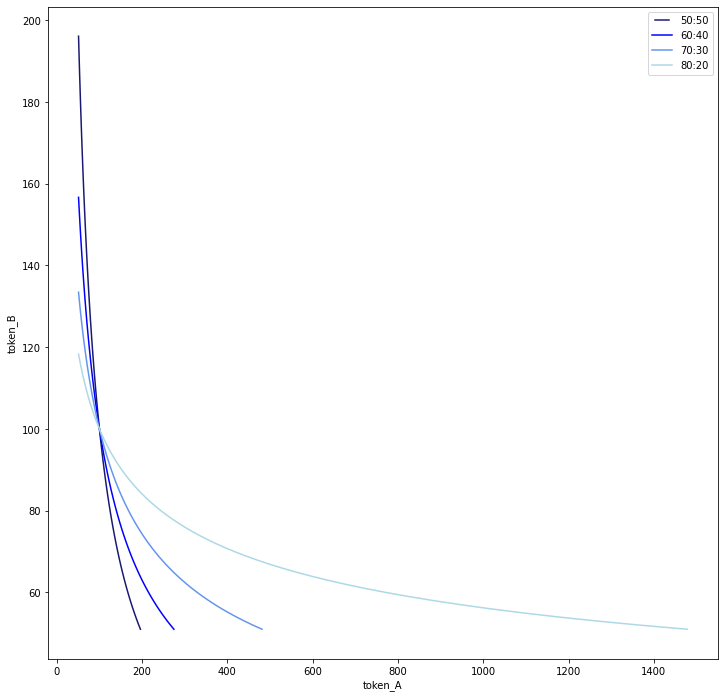

In [21]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(12, 12))
line1, = plt.plot(df5050['asset_i'], df5050['asset_o'], color='midnightblue', label="50:50")
line2, = plt.plot(df6040['asset_i'], df6040['asset_o'], color='blue', label="60:40")
line3, = plt.plot(df7030['asset_i'], df7030['asset_o'], color='cornflowerblue', label="70:30")
line4, = plt.plot(df8020['asset_i'], df8020['asset_o'], color='lightblue', label="80:20")


plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel("token_A")
plt.ylabel("token_B")

#plt.xscale("log")
#plt.yscale("log")
plt.show()

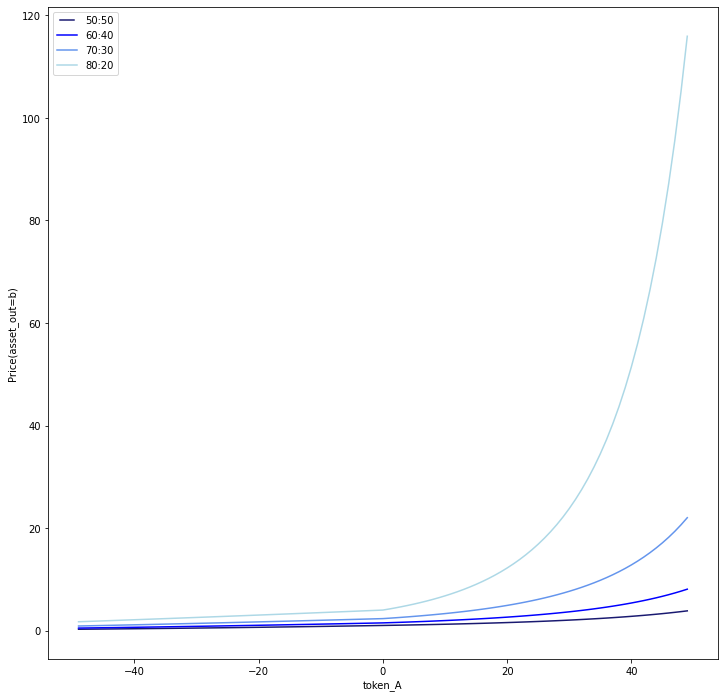

In [22]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(12, 12))
line1, = plt.plot(df5050.index, df5050['price'], color='midnightblue', label="50:50")
line2, = plt.plot(df6040.index, df6040['price'], color='blue', label="60:40")
line3, = plt.plot(df7030.index, df7030['price'], color='cornflowerblue', label="70:30")
line4, = plt.plot(df8020.index, df8020['price'], color='lightblue', label="80:20")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel("token_A")
plt.ylabel("Price(asset_out=b)")

#plt.xscale("log")
#plt.yscale("log")
plt.show()

In [23]:
wp = WeightedPool()
wp.join_pool({'a':100,'b':100},{'a':0.5,'b':0.5})
wp.swap_fee = 0.0

df = calcCurve(wp, 'a', 'b')

In [24]:
p_df = df[df['asset_i']>100]

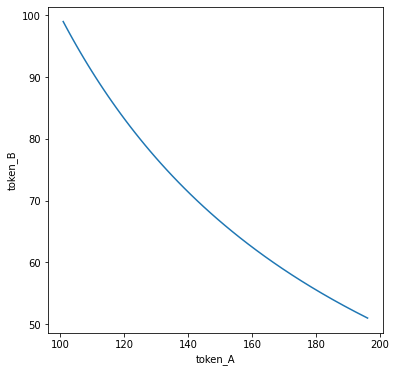

In [25]:
plt.figure(figsize=(6, 6))
plt.plot(p_df['asset_i'], p_df['asset_o'])
plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()
